<a href="https://colab.research.google.com/github/Rishabhrv/Research-Papers-Code/blob/main/Enhancing%20Hybrid%20Intrusion%20Detection%20and%20Prevention%20system%20for%20flooding%20Attack/Hybrid_Intrusion_Detection_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Enhancing Hybrid Intrusion Detection and Prevention system for flooding Attack***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
warnings.filterwarnings(action='ignore')

In [ ]:
! unzip nslkdd.zip

In [ ]:
Train_data=pd.read_csv("/content/KDDTrain+.txt")
Test_data=pd.read_csv("/content/KDDTest+.txt")
print(Train_data.shape)
print(Test_data.shape)

(125972, 43)
(22543, 43)


In [ ]:
Train_data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
Train_data.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17.1', '0.03',
       '0.17.2', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

# Data Cleaning

In [ ]:
Train_data.drop('20',axis=1,inplace=True)
Test_data.drop('21',axis=1,inplace=True)

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'])

In [ ]:
Train_data.columns = columns
Test_data.columns = columns
Train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [ ]:
Train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## EDA

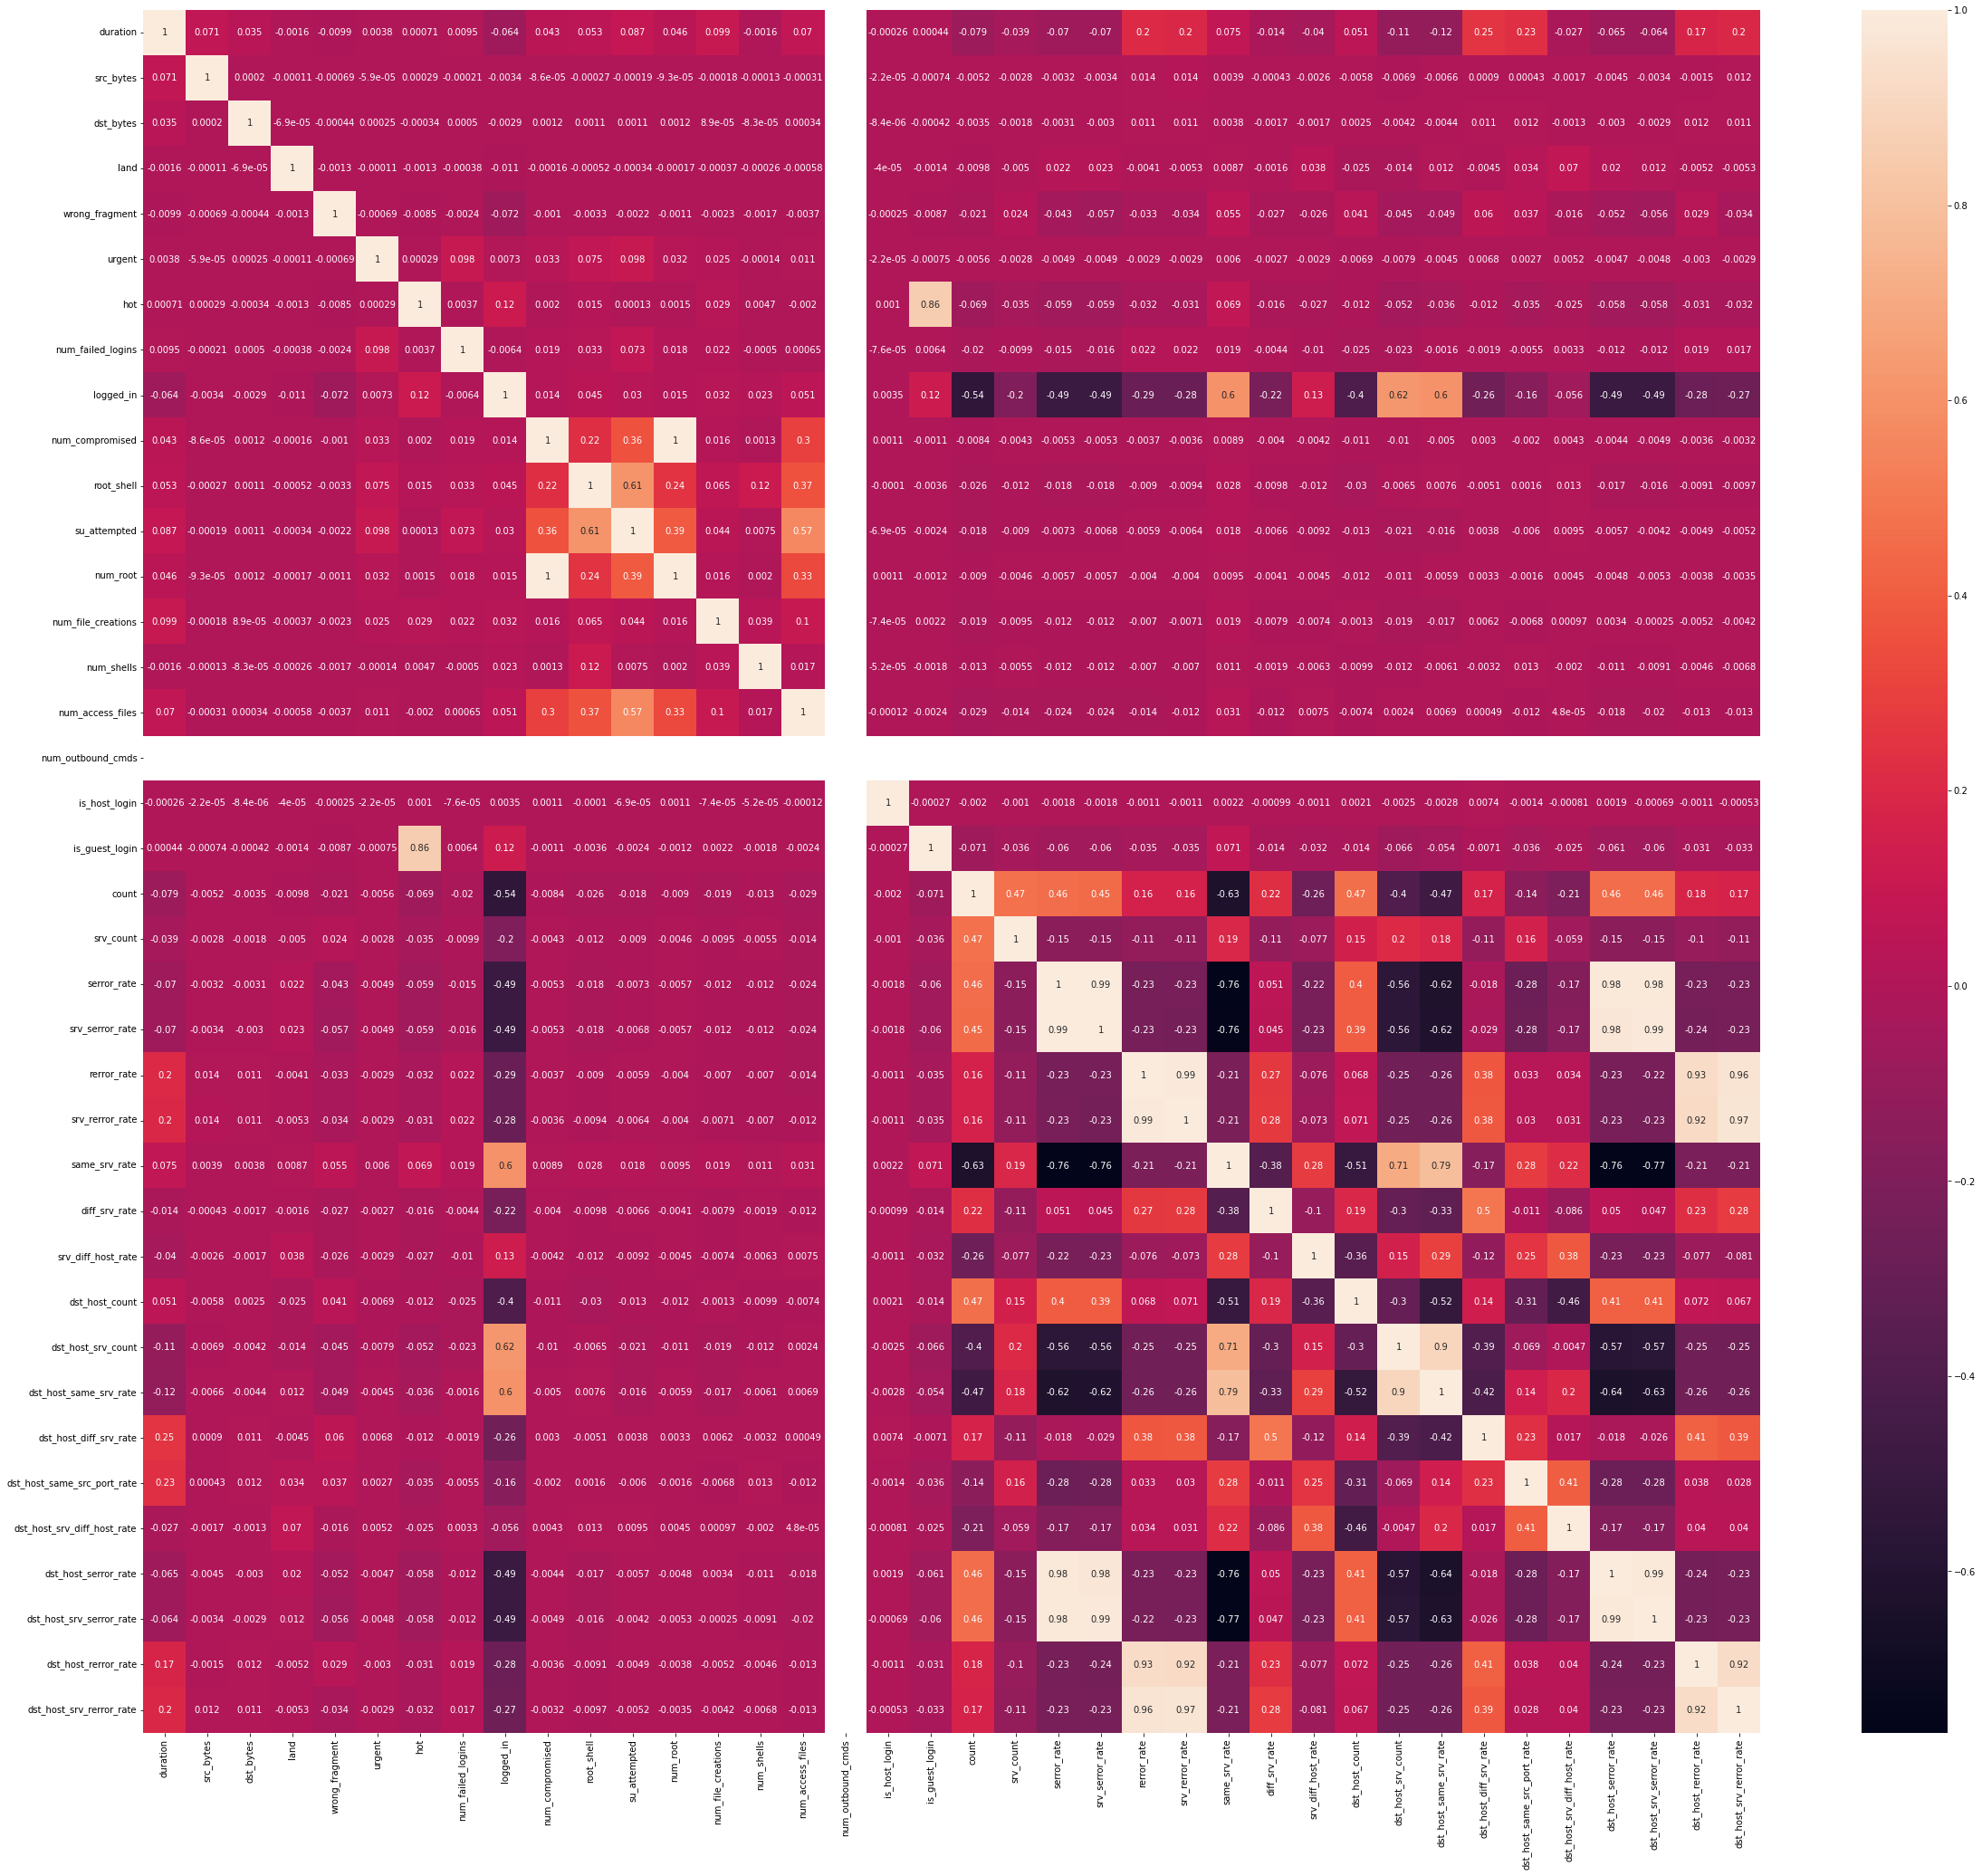

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(Train_data.corr(), annot= True)

In [ ]:
Train_data.drop('num_outbound_cmds',axis=1,inplace=True)
Test_data.drop('num_outbound_cmds',axis=1,inplace=True)

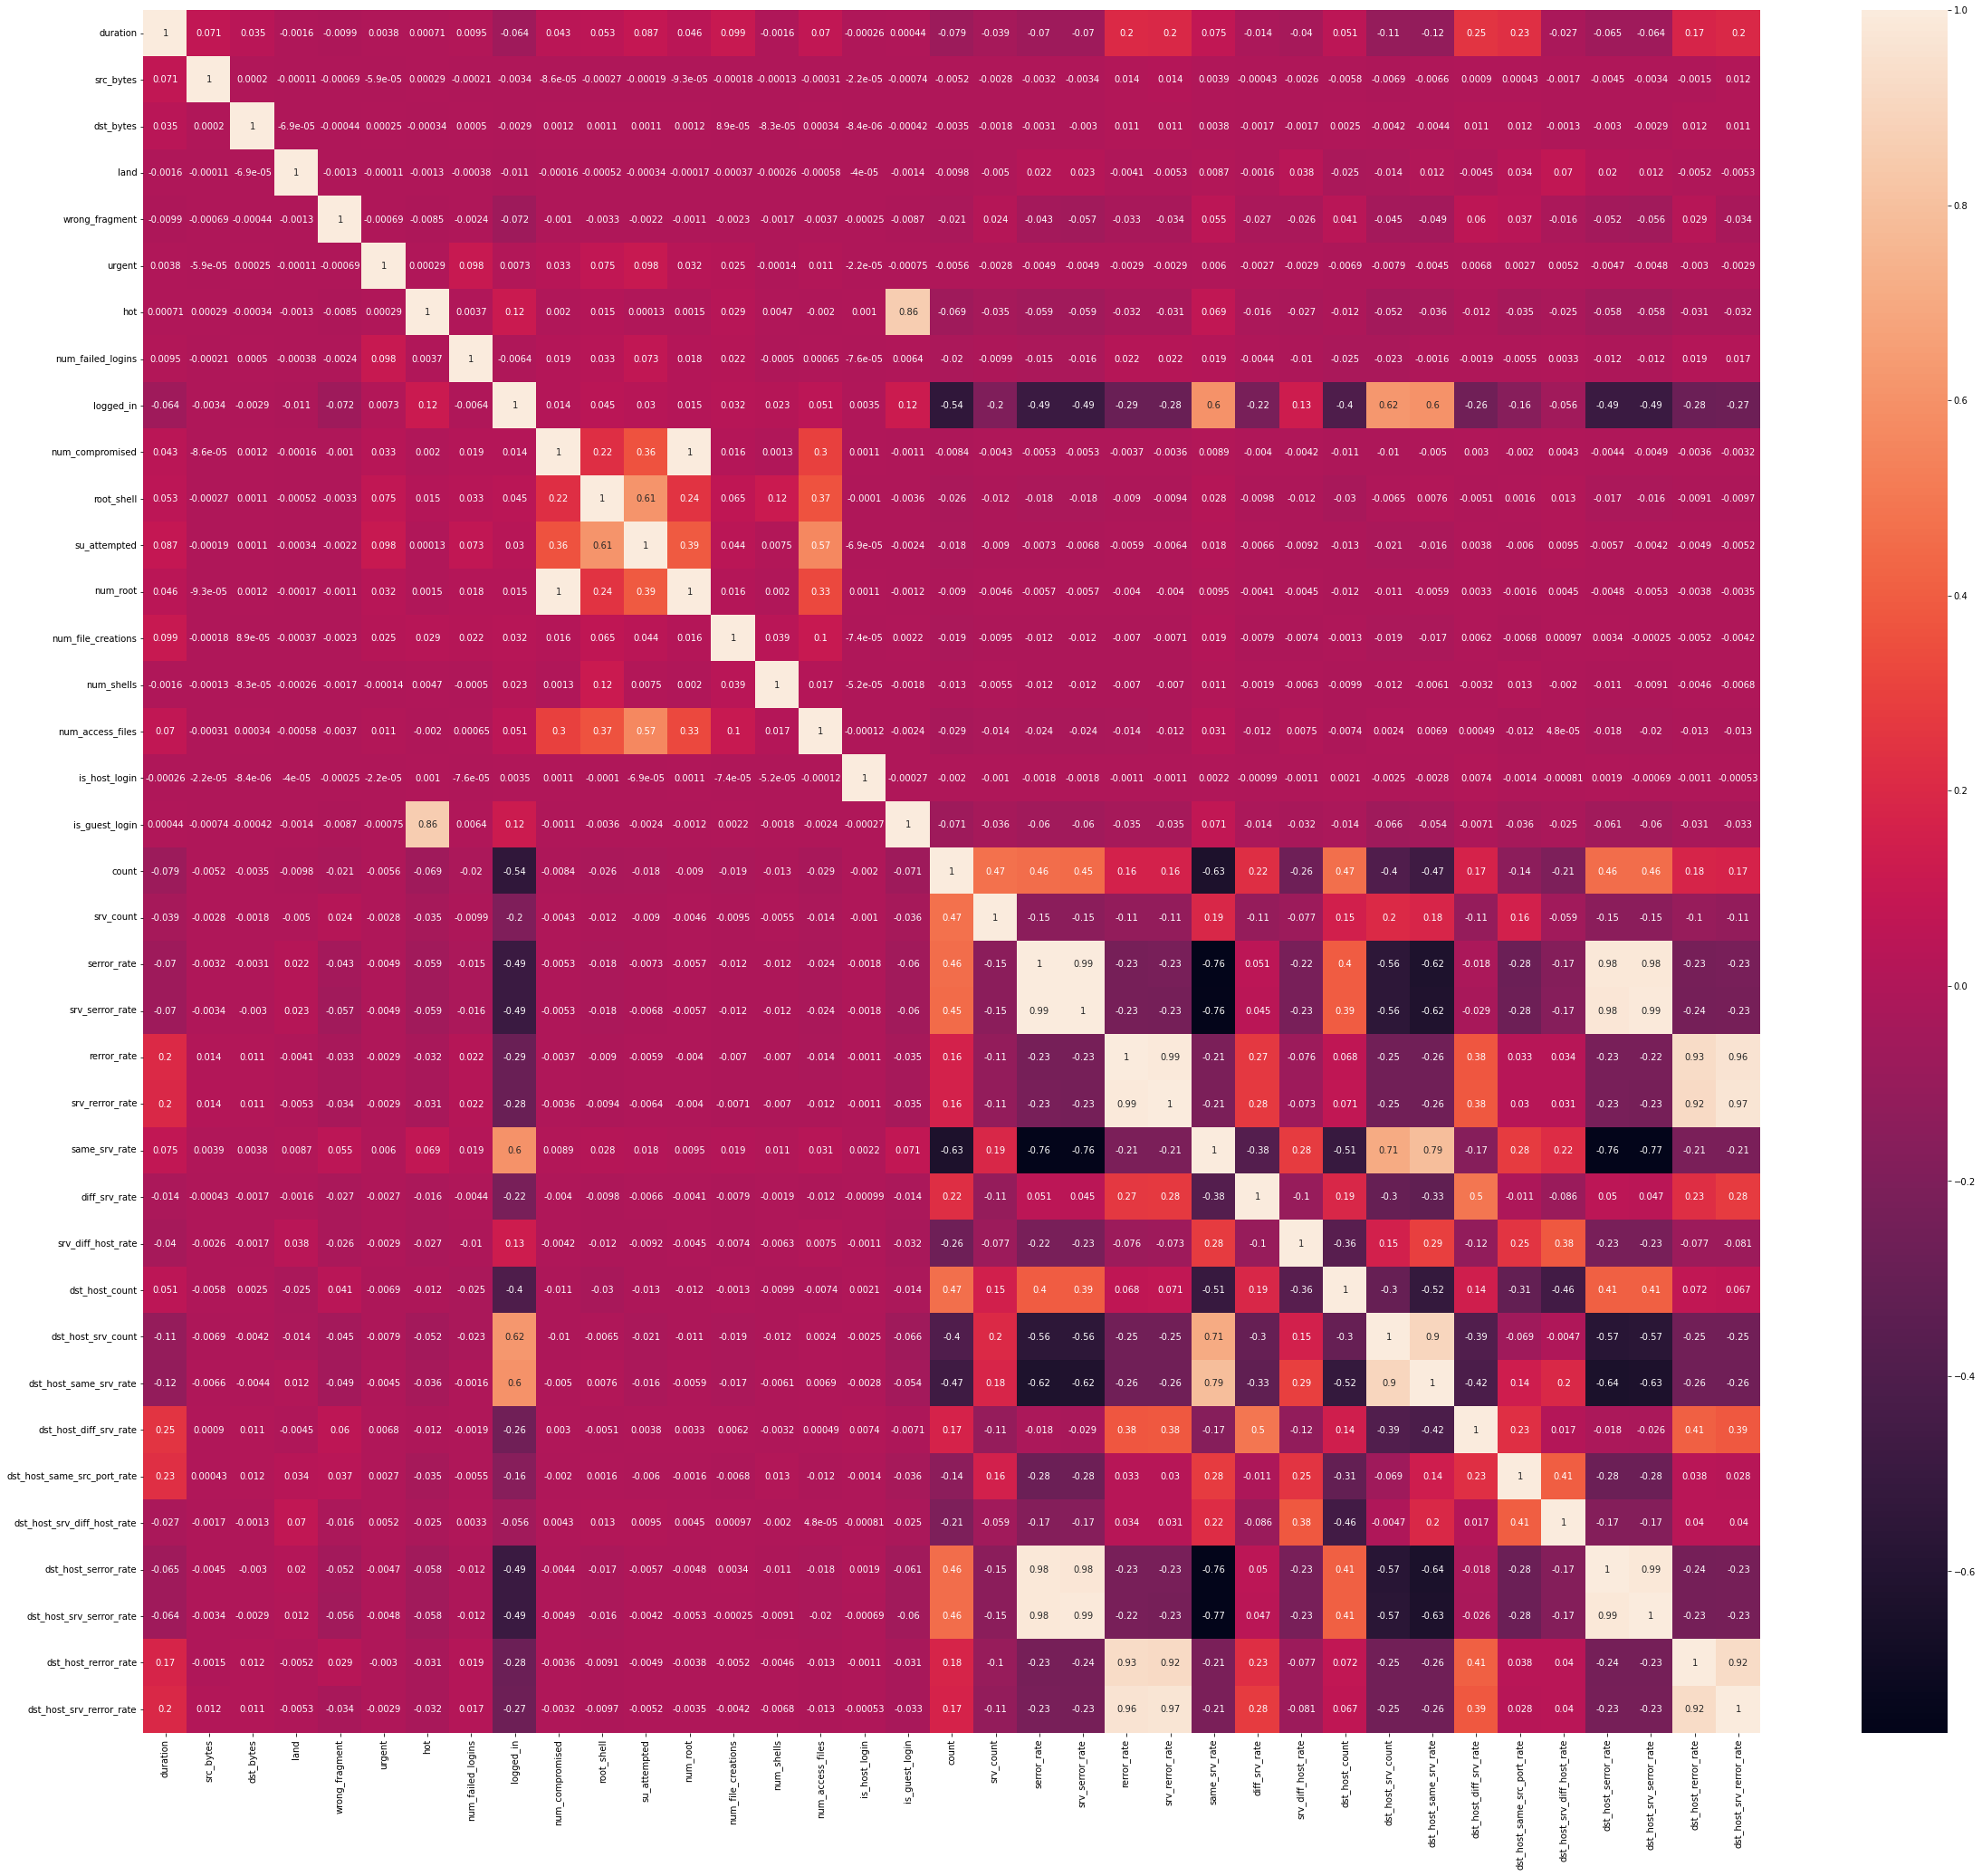

In [ ]:
plt.figure(figsize=(40,35))
sns.heatmap(Train_data.corr(), annot= True)

In [ ]:
Train_data.duplicated().sum()

0

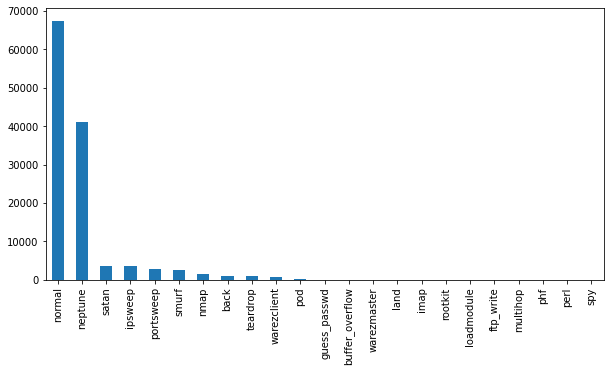

In [ ]:
Train_data['attack'].value_counts().plot(kind='bar',figsize = (10,5))

In [ ]:
def attack (row):
  if(row['attack']!='normal'):
    attack=1
    return attack
  else:
    attack=0
    return attack
    
Train_data['attack']=Train_data.apply(attack,axis=1)
Test_data['attack']=Test_data.apply(attack,axis=1)

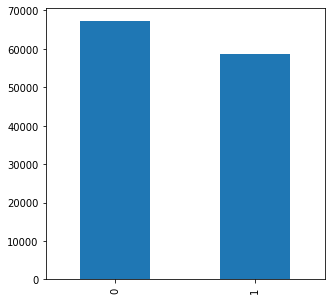

In [ ]:
Train_data['attack'].value_counts().plot(kind='bar',figsize = (5,5))

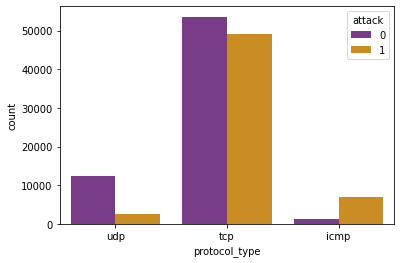

In [ ]:
sns.countplot(x='protocol_type',hue='attack' , data = Train_data , palette ='CMRmap')

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

# **Preproccessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [ ]:
Train_data['protocol_type'] = protocol_type_le.fit_transform(Train_data['protocol_type'])
Train_data['service'] = service_le.fit_transform(Train_data['service'])
Train_data['flag'] = flag_le.fit_transform(Train_data['flag'])

In [ ]:
Test_data['protocol_type'] = protocol_type_le.fit_transform(Test_data['protocol_type'])
Test_data['service'] = service_le.fit_transform(Test_data['service'])
Test_data['flag'] = flag_le.fit_transform(Test_data['flag'])

In [ ]:
Train_data.shape

(125972, 41)

In [ ]:
x_train = Train_data.drop(columns = ['attack'], axis = 'columns')
y_train = Train_data['attack']

x_test = Test_data.drop(columns = ['attack'], axis = 'columns')
y_test = Test_data['attack']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(125972, 40)
(125972,)
(22543, 40)
(22543,)


In [ ]:
feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.fit_transform(x_test)

# Feature Extraction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=18)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=18)

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

array([4.59747603e-03, 3.48054143e-02, 2.01222582e-02, 7.19958390e-02,
       4.75715197e-01, 1.57423185e-01, 3.66853780e-05, 2.29836947e-03,
       3.88908352e-05, 1.38010931e-02, 2.29462780e-04, 4.83846154e-03,
       4.26762594e-03, 7.13556934e-05, 1.70259435e-05, 2.13621710e-04,
       1.68585348e-04, 1.01938177e-04, 6.02538340e-05, 0.00000000e+00,
       4.20898751e-04, 3.26145242e-02, 1.75061569e-02, 6.71386493e-04,
       5.74815189e-04, 1.12510702e-03, 4.11664310e-04, 4.31482404e-02,
       9.99478475e-03, 1.71200512e-04, 4.70872163e-03, 3.40908616e-02,
       1.39139210e-02, 1.02292636e-02, 1.90112081e-02, 9.79653324e-03,
       2.88121559e-03, 2.63901710e-03, 3.42599017e-03, 1.86175016e-03])

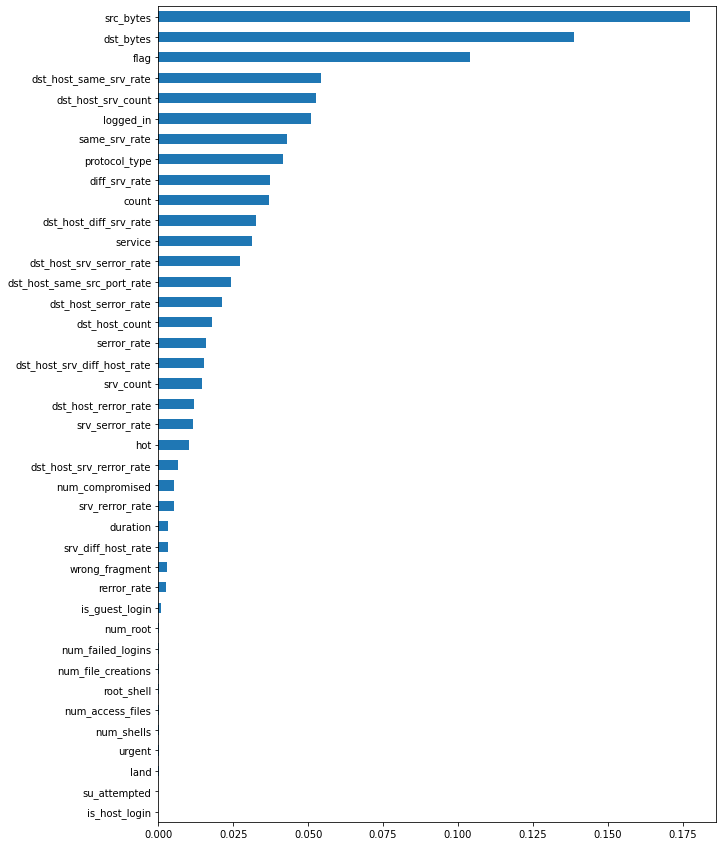

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=True).plot(kind='barh',figsize=(10,15))

In [ ]:
forest_importances.sort_values(ascending=False).head(20).index

Index(['src_bytes', 'dst_bytes', 'flag', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'protocol_type',
       'diff_srv_rate', 'count', 'dst_host_diff_srv_rate', 'service',
       'dst_host_srv_serror_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_count', 'serror_rate',
       'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate'],
      dtype='object')

# New Data

In [ ]:
New_Train_data = Train_data[['src_bytes', 'dst_bytes', 'flag', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'protocol_type',
       'diff_srv_rate', 'count', 'dst_host_diff_srv_rate', 'service',
       'dst_host_srv_serror_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_count', 'serror_rate',
       'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate','attack']]

New_Test_data = Test_data[['src_bytes', 'dst_bytes', 'flag', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'protocol_type',
       'diff_srv_rate', 'count', 'dst_host_diff_srv_rate', 'service',
       'dst_host_srv_serror_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_count', 'serror_rate',
       'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate','attack']]

print('Train shape',New_Train_data.shape)
print('Test shape',New_Test_data.shape)

#x_train = New_Train_data.drop(columns = ['attack'], axis = 'columns')
#y_train = New_Train_data['attack']

#x_test = New_Test_data.drop(columns = ['attack'], axis = 'columns')
#y_test = New_Test_data['attack']

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

Train shape (125972, 21)
Test shape (22543, 21)


In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.fit_transform(x_test)

In [ ]:
train = pd.DataFrame(data = x_train,columns=['src_bytes', 'dst_bytes', 'flag', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'protocol_type',
       'diff_srv_rate', 'count', 'dst_host_diff_srv_rate', 'service',
       'dst_host_srv_serror_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_count', 'serror_rate',
       'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate'])

test = pd.DataFrame(data = x_test,columns=['src_bytes', 'dst_bytes', 'flag', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'same_srv_rate', 'protocol_type',
       'diff_srv_rate', 'count', 'dst_host_diff_srv_rate', 'service',
       'dst_host_srv_serror_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_count', 'serror_rate',
       'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate'])

In [ ]:
def attack (row):
  if(row['attack']==1):
    attack='anomaly'
    return attack
  else:
    attack='normal'
    return attack
    
Train_data['attack']=Train_data.apply(attack,axis=1)
Test_data['attack']=Test_data.apply(attack,axis=1)

In [ ]:
Test_data['attack']

0        anomaly
1         normal
2        anomaly
3        anomaly
4         normal
          ...   
22538     normal
22539     normal
22540    anomaly
22541     normal
22542    anomaly
Name: attack, Length: 22543, dtype: object

In [ ]:
train['attack'] = Train_data['attack']
test['attack'] = Test_data['attack']

# Implimenting Proposed Model C4.5

In [ ]:
!pip install chefboost

In [ ]:
from chefboost import Chefboost as chef
config = {'algorithm': 'C4.5'}
model = chef.fit(train,config = config,target_label = 'attack')

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  343.61068987846375  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.29825675546947 % on  125972  instances
Labels:  ['normal' 'anomaly']
Confusion matrix:  [[66944, 486], [398, 58144]]
Precision:  99.2793 %, Recall:  99.409 %, F1:  99.3441 %


In [ ]:
yhat =[]
target=[]

for index,instance in test.iterrows():
  pred = chef.predict(model,instance)
  actual = instance['attack']
  yhat.append(pred)
  target.append(actual)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target,yhat))

              precision    recall  f1-score   support

     anomaly       0.88      0.57      0.69     12832
      normal       0.61      0.90      0.73      9711

    accuracy                           0.71     22543
   macro avg       0.75      0.73      0.71     22543
weighted avg       0.77      0.71      0.71     22543



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(target,yhat)

0.7112629197533602

In [ ]:
confusion_matrix(target,yhat)

array([[7314, 5518],
       [ 991, 8720]])

Text(42.0, 0.5, 'Truth')

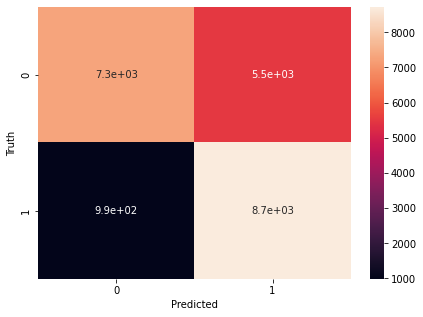

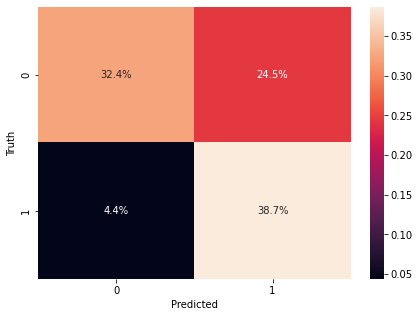

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target,yhat)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SVM

In [ ]:
lin_svc = SVC(kernel='linear').fit(x_train,y_train)
Y_pred =lin_svc.predict(x_test)
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

The Training accuracy =  0.9598482202394183
The Testing accuracy =  0.7861420396575434
------------------------------------------------
linearSVC  accuracy  : 0.786


In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      9711
           1       0.93      0.68      0.78     12832

    accuracy                           0.79     22543
   macro avg       0.81      0.80      0.79     22543
weighted avg       0.82      0.79      0.79     22543



In [ ]:
start_time = time.time()
rbf_svc = SVC(kernel='rbf').fit(x_train,y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
elapsed_time = time.time() - start_time
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))
print(classification_report(y_test,Y_pred_rbf))
print(elapsed_time)

The Training accuracy =  0.9925697774108532
The Testing accuracy =  0.8185245974360111
------------------------------------------------
linearSVC  accuracy  : 0.819
              precision    recall  f1-score   support

           0       0.71      0.98      0.82      9711
           1       0.98      0.70      0.81     12832

    accuracy                           0.82     22543
   macro avg       0.84      0.84      0.82     22543
weighted avg       0.86      0.82      0.82     22543

120.36219477653503


In [ ]:
start_time = time.time()
poly_svc = SVC(kernel='poly').fit(x_train,y_train)
Y_pred_poly =poly_svc.predict(x_test)
elapsed_time = time.time() - start_time
print('The Training accuracy = ',poly_svc.score(x_train, y_train))
print('The Testing accuracy = ',poly_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))
print(elapsed_time)

The Training accuracy =  0.9925539008668594
The Testing accuracy =  0.7807301601384021
------------------------------------------------
linearSVC  accuracy  : 0.781
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.64      0.77     12832

    accuracy                           0.78     22543
   macro avg       0.82      0.80      0.78     22543
weighted avg       0.84      0.78      0.78     22543

103.93198013305664


# SVM with Feature Extraction

In [ ]:
xtrain = train.drop(columns = ['attack'], axis = 'columns')
ytrain = train['attack']

xtest = test.drop(columns = ['attack'], axis = 'columns')
ytest = test['attack']

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(125972, 20)
(125972,)
(22543, 20)
(22543,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [ ]:
start_time = time.time()
rbf_svc = SVC(kernel='rbf').fit(xtrain,ytrain)
Y_pred_rbf =rbf_svc.predict(xtest)
elapsed_time = time.time() - start_time
print('The Training accuracy = ',rbf_svc.score(xtrain, ytrain))
print('The Testing accuracy = ',rbf_svc.score(xtest, ytest))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(ytest,Y_pred_rbf),3)))
print(classification_report(ytest,Y_pred_rbf))
print(elapsed_time)

The Training accuracy =  0.9859651351093894
The Testing accuracy =  0.7788226944062459
------------------------------------------------
linearSVC  accuracy  : 0.779
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     12832
           1       0.67      0.97      0.79      9711

    accuracy                           0.78     22543
   macro avg       0.82      0.80      0.78     22543
weighted avg       0.84      0.78      0.78     22543

85.21306943893433


In [ ]:
y = Train_data['attack'].copy()
x = Train_data.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [ ]:
start_time = time.time()
rbf_svc = SVC(kernel='rbf').fit(x_train,y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
elapsed_time = time.time() - start_time
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))
print(classification_report(y_test,Y_pred_rbf))
print(elapsed_time)

The Training accuracy =  0.9920843728736675
The Testing accuracy =  0.9914796782387807
------------------------------------------------
linearSVC  accuracy  : 0.991
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20006
           1       0.99      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792

52.733022689819336
